In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('results/qCW4k.csv')
df

,Size (bytes),Size (readable),Time (ms),mb/s
0,0,NaN undefined,15.8,0.000000
1,0,NaN undefined,7.8,0.000000
2,0,NaN undefined,9.4,0.000000
3,0,NaN undefined,6.2,0.000000
4,0,NaN undefined,8.0,0.000000
...,...,...,...,...
495,4950000,4.72 MB,1793.7,2.759659
496,4950000,4.72 MB,1616.3,3.062550
497,4950000,4.72 MB,1821.7,2.717242
498,4950000,4.72 MB,1823.4,2.714709


In [15]:
def makeScatter(df, testname):
    df['Size (mb)'] = df['Size (bytes)'] * 1e-6

    # Prepare the data for linear regression (flipping axes: Size as X and Time as Y)
    X = df['Size (mb)'].values.reshape(-1, 1)
    y = df['Time (ms)'].values * 1e-3  # Convert time from ms to seconds

    # Perform linear regression
    model = LinearRegression()
    model.fit(X, y)

    # Calculate predictions and R^2
    y_pred = model.predict(X)
    r_squared = model.score(X, y)

    # Plot the data and the fitted line
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Size (mb)'], y, label='Original Data', marker='o')
    plt.plot(df['Size (mb)'], y_pred, color='red', linestyle='--', label='Fitted Line')
    plt.title(f'{testname} Time (s) vs Size (mb)')
    plt.xlabel('Size (mb)')
    plt.ylabel('Time (s)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print the results
    print(f'Intercept (base latency): {model.intercept_}')
    print(f'Slope: {model.coef_[0]}')
    print(f'R^2: {r_squared}')

    # calculate mb/s from slope
    slope = model.coef_[0]

    # slope is s/mb -> mb / s
    mb_per_s = 1 / slope
    print(f'MB/s: {mb_per_s}')

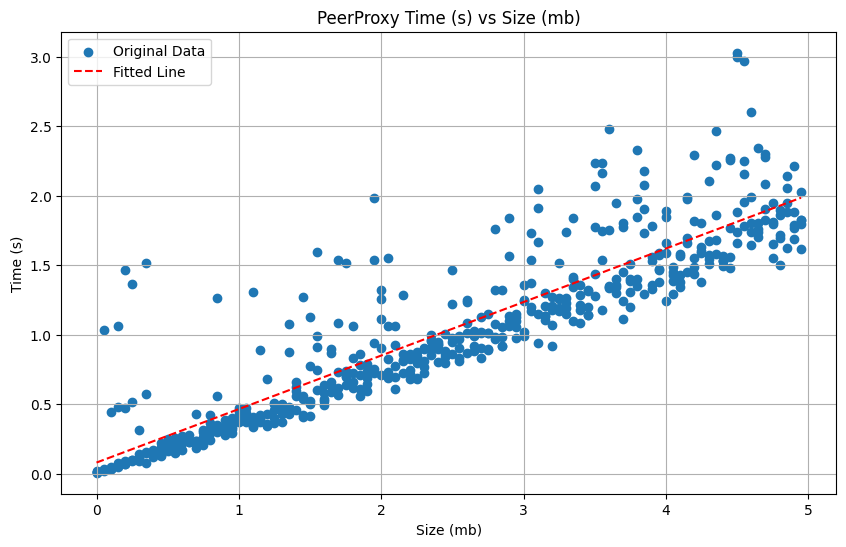

Intercept (base latency): 0.07931556435643572
Slope: 0.38486013561356136
R^2: 0.7918848925284818
MB/s: 2.59834653543879


In [16]:
makeScatter(df, 'PeerProxy')

In [6]:
ngrokDf = pd.read_csv('results/ngrokThroughput.csv')
ngrokDf

,Size (bytes),Size (readable),Time (ms),mb/s
0,0,NaN undefined,38.1,0.000000
1,0,NaN undefined,35.5,0.000000
2,0,NaN undefined,35.3,0.000000
3,0,NaN undefined,35.0,0.000000
4,0,NaN undefined,34.8,0.000000
...,...,...,...,...
495,4950000,4.72 MB,368.4,13.436482
496,4950000,4.72 MB,394.0,12.563452
497,4950000,4.72 MB,364.5,13.580247
498,4950000,4.72 MB,394.6,12.544349


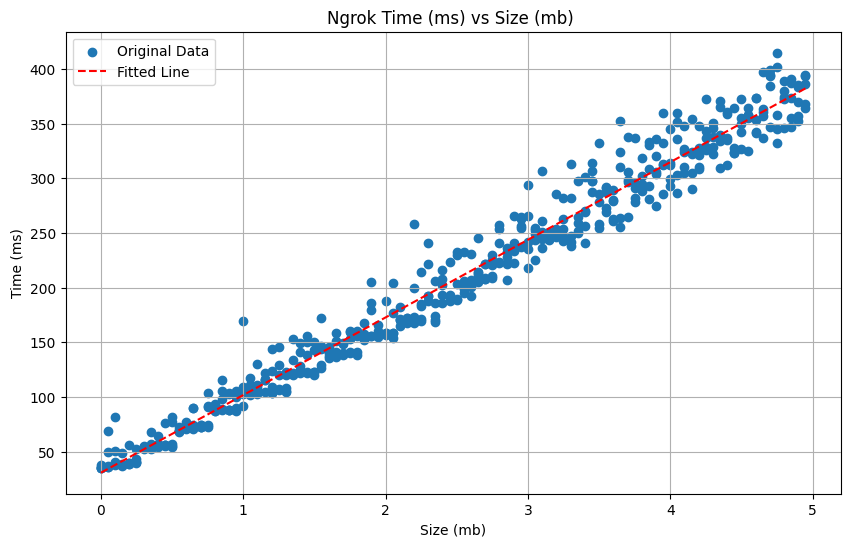

Intercept (base latency): 30.63182574257425
Slope: 71030211.82118213
R^2: 0.9732177277005137
MB/s: 1.4078516371561586e-05


In [7]:
makeScatter(ngrokDf, 'Ngrok')

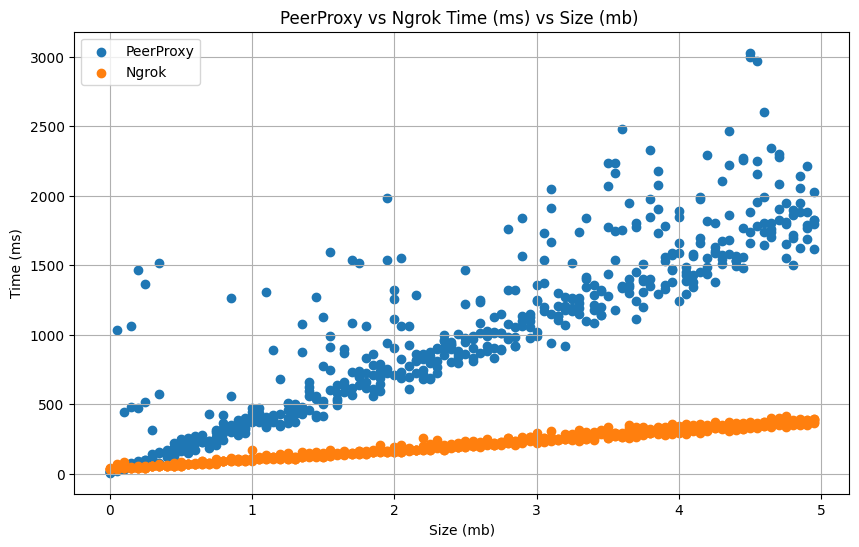

In [8]:
# plot both ngrok and peerproxy on the same graph with different colors
plt.figure(figsize=(10, 6))
plt.scatter(df['Size (mb)'], df['Time (ms)'], label='PeerProxy', marker='o')
plt.scatter(ngrokDf['Size (mb)'], ngrokDf['Time (ms)'], label='Ngrok', marker='o')
plt.title('PeerProxy vs Ngrok Time (ms) vs Size (mb) ')
plt.xlabel('Size (mb)')
plt.ylabel('Time (ms)')
plt.legend()
plt.grid(True)
plt.show()


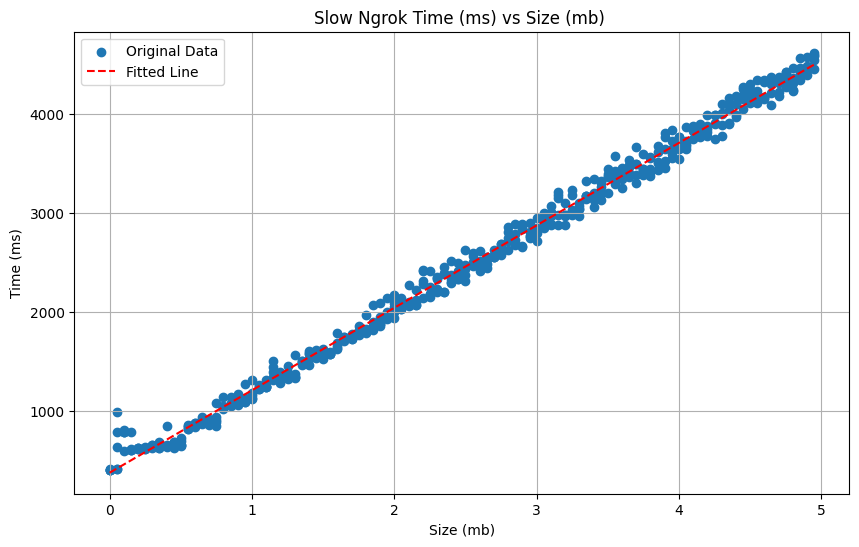

Intercept (base latency): 376.4337821782178
Slope: 833328976.8976898
R^2: 0.9941159058251596
MB/s: 1.2000062733001217e-06


In [9]:
slowNgrok = pd.read_csv('results/slowNgrok.csv')

makeScatter(slowNgrok, 'Slow Ngrok')

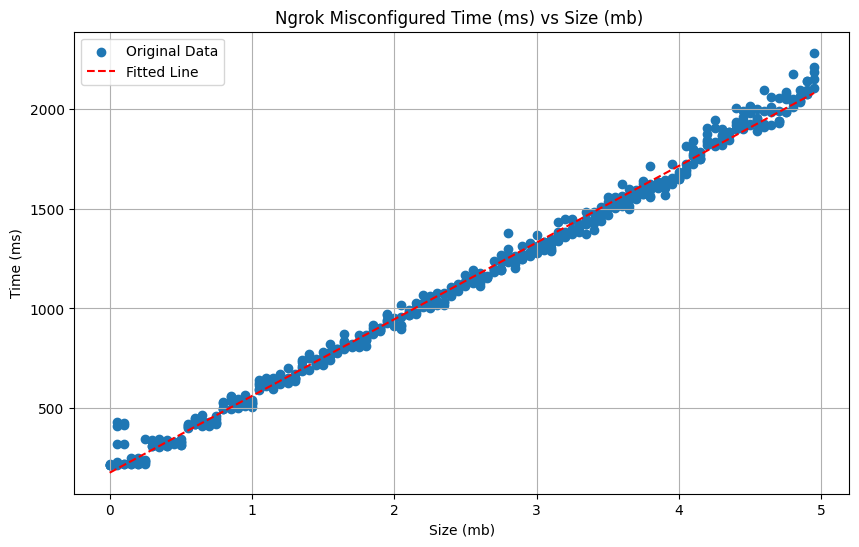

Intercept (base latency): 175.74097425742536
Slope: 385024091.20912105
R^2: 0.9932576636020993
MB/s: 2.5972400762238602e-06


In [11]:
eungrok = pd.read_csv('results/ngrokMisconfiguredThroughput.csv')

makeScatter(eungrok, 'Ngrok Misconfigured')